# Práctica 8. Algoritmo GDX

In [1]:
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
x = np.arange(0.1,100,.5)
z = -np.log(x*10)
y =z+np.sin((10*np.pi*x)/16)*2

def momentum(x, gamma):
    y_m=[0]*(len(x))
    y_m[0]=y[0]
    for i in range(1,len(x)):
        y_m[i] = gamma*y_m[i-1]+(1-gamma)*y[i]
    return y_m

In [3]:
y_m1 = momentum(x,0.8)
y_m2 = momentum(x,0.9)
y_m3 = momentum(x,0.95)
y_m4 = momentum(x,0.98)

<IPython.core.display.Javascript object>


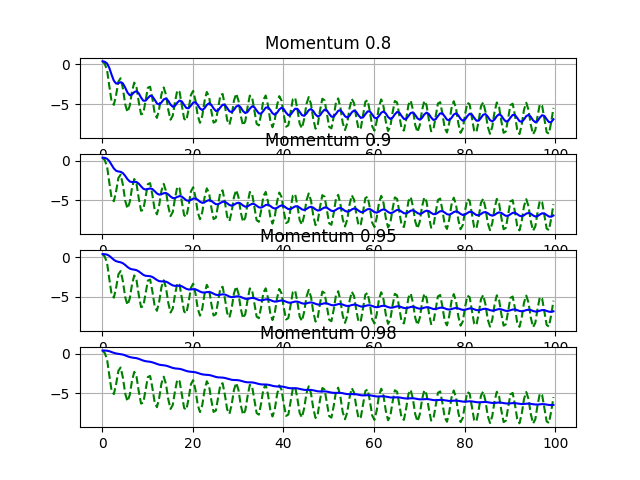

In [8]:


plt.figure()
plt.title('Variacion de momentum')
plt.subplot(4,1,1)
plt.plot(x,y,'g--')
plt.plot(x,y_m1, 'blue')
plt.title('Momentum 0.8')
plt.grid(True)

plt.subplot(4,1,2)
plt.plot(x,y,'g--')
plt.plot(x,y_m2, 'blue')
plt.title('Momentum 0.9')
plt.grid(True)

plt.subplot(4,1,3)
plt.plot(x,y,'g--')
plt.plot(x,y_m3, 'blue')
plt.title('Momentum 0.95')
plt.grid(True)

plt.subplot(4,1,4)
plt.plot(x,y,'g--')
plt.plot(x,y_m4, 'blue')
plt.title('Momentum 0.98')
plt.grid(True)

plt.show()

# Regla de actualización para Gradiente Descendente
$$\Large W_{k+1} = W_{k} + \Delta W_{k} $$
### Donde
$$\Large \Delta W_{k} = -\eta \delta^l a^{l-1}$$


# Regla de actualización para Gradiente Descendente con momentum
$$\Large W_{k+1} = W_{k} + \Delta W_{k} $$
### Donde
$$\Large \Delta W_{k} = \gamma \Delta W_{k-1} - \eta \delta^l a^{l-1} \\ $$
$$\Large 0<\gamma<1$$

# Funciones para normalizar datos

In [9]:
def minmax(x,min,max, reverse=False):
    if reverse:
        return(x*(max-min)+min)
    return (x-min)/(max-min)

def mapminmax(array, min_max=None, reverse=False):
    if(min_max and reverse):
        (min,max) = min_max
        vminmax = np.vectorize(minmax)
        return vminmax(array,min,max,True)
    min = np.min(array)
    max = np.max(array)
    vminmax = np.vectorize(minmax)
    return (vminmax(array,min,max),min,max)

def vminmax(vector, min_max=None, reverse=False):
    norm = []
    (min,max) = min_max
    for n in vector:
        norm.append(minmax(n,min,max,reverse))
    return np.array(norm)


In [10]:
class net():
    def __init__(self, weights, function, function_prime):
        self.W=weights
        self.function = function
        self.function_prime = function_prime
        self.grad=None
        self.a = []
        self.z = []
        
    def eval(self,x):
        for i in range(len(self.W)):
            if i==0:
                a = x
                self.a.append(np.vstack((a, (np.ones((1,x.shape[1]))))))
            else:
                a = self.a[-1]
            self.z.append(np.dot(self.W[i], self.a[-1]))
            a = self.function[i](self.z[-1])
            if i<len(self.W)-1:
                self.a.append(np.vstack((a, (np.ones((1,x.shape[1]))))))
        return a

    
    
class Optimizer:
    def train(self,net,e):
        pass
        
class GradientDescent2(Optimizer):
    def __init__(self, eta=0.01):
        self.eta=eta
    
    def train(self, net, e):
        layers = len(net.W)
        delta = []
        grad = []
        for i in range(layers)[::-1]:
            if i==layers-1:
                delta.append(np.multiply(-2*net.function_prime[i](net.z[i]),e))
                DW21 = -self.eta*np.dot(delta[-1], net.a[i].T)
                net.W[i] = np.add(net.W[i],DW21)
            else:
                W21 = np.delete(net.W[i+1],np.s_[-1:], axis=1)
                delta.append(np.multiply (net.function_prime[i](net.z[i]),np.dot(W21.T,delta[-1])))
                DW10 = -self.eta*np.dot(delta[-1], net.a[i].T)
                net.W[i] = np.add(net.W[i],DW10)



class GradientDescentMomentum2(Optimizer):    
    def __init__(self, eta=0.01, gamma=0.9):
        self.eta=eta
        self.gamma=gamma
    
    def train(self, net, e):
        layers = len(net.W)
        delta = []
        grad = []
        if(not net.grad):
            net.grad = len(net.W)*[0]

        for i in range(layers)[::-1]:
            if i==layers-1:
                delta.append(np.multiply(-2*net.function_prime[i](net.z[i]),e))
                DW21 = self.eta*np.dot(delta[-1], net.a[i].T)
                net.grad[i] = self.gamma*net.grad[i] + DW21
                net.W[i] = np.subtract(net.W[i],net.grad[i])
                #net.W[i] = np.add(net.W[i],DW21)
            else:
                W21 = np.delete(net.W[i+1],np.s_[-1:], axis=1)
                delta.append(np.multiply (net.function_prime[i](net.z[i]),np.dot(W21.T,delta[-1])))
                DW10 = self.eta*np.dot(delta[-1], net.a[i].T)
                net.grad[i] = self.gamma*net.grad[i] + DW10
                net.W[i] = np.subtract(net.W[i],net.grad[i])
                #net.W[i] = np.add(net.W[i],DW10)
        
class GDX(GradientDescentMomentum2):
    def __init__(self, eta=0.01, gamma=0.9, eta_inc = 1.05, eta_dec = 0.7, max_perf_inc = 1.04):
        super(eta, gamma)
        self.eta_inc = eta_inc
        self.eta_dec = eta_dec
        self.max_perf_inc = max_perf_inc
        
    def train(self, net, e):
        pass


In [11]:
from decimal import Decimal


def tanh_prime(x):
    return 1-np.power(np.tanh(x),2)


def test_net(optimizer, train_data, test_data=None, max_epoch = 1000):

    inputs = train_data['input']
    targets = train_data['target']
    (inputs,imin, imax) = mapminmax(inputs)
    (targets,tmin, tmax) = mapminmax(targets)

    if test_data:
        testinputs = test_data['input']
        testtargets = test_data['target']
        (testinputs,testimin, testimax) = mapminmax(testinputs)
        (testtargets,testtmin, testtmax) = mapminmax(testtargets)

    
    N0 = inputs.shape[1]
    N1 = 3
    N2 = targets.shape[1]

    test_error = []
    max_models = 10
    i=0
    epoch = 0
    error_evolution=[]
    W10 = np.random.uniform(-.5,.5,(N1, N0))
    W10_ = np.hstack((W10, (np.ones((N1,1)))))

    W21 = np.random.uniform(-.5,.5,(N2, N1))
    W21_ = np.hstack((W21, (np.ones((N2,1)))))

    W =  [W10_, W21_]
    functions=[np.tanh, np.tanh]
    function_prime=[tanh_prime, tanh_prime]
    model = net(W, functions, function_prime) #net instance
    while epoch<max_epoch:
        y_pred = model.eval(inputs.T) #output
        e = np.subtract(targets.T, y_pred) #error
        E = np.power(e,2) #Loss
        error_evolution.append(np.sum(E))
        optimizer.train(model, e)
        if test_data:
            y_pred = model.eval(testinputs.T) #output
            test_e = np.subtract(testtargets.T, y_pred) #error
            test_E = np.power(test_e,2) #Loss
            test_error.append(np.sum(test_E))
        if epoch%100==0:
            pass
            print("Error: {:.2e}, epoch {}".format(Decimal(np.sum(E)),epoch))
        epoch = epoch + 1
    if test_data:
        return (model,error_evolution, test_error)
    return (model,error_evolution)





# Prueba con dataset sintético

In [12]:
inputs = np.array([[4.7,6.0],
      [6.1,3.9],
      [2.9,4.2],
      [7.0,5.5]])
targets = np.array([[3.52,4.02],    
      [5.43,6.23],
      [4.95,5.76],
      [4.70,4.28]])
train_data = {'input':inputs, 'target':targets}

trainGD = GradientDescent2(eta=0.01)
trainGDM = GradientDescentMomentum2(eta=0.01, gamma=0.9)
print("\nGradiente descendente\n")
_,err_gd = test_net(trainGD, train_data)
print("\nGradiente descendente con momentum\n")
_,err_gdm = test_net(trainGDM , train_data)




Gradiente descendente

Error: 1.69e+0, epoch 0
Error: 6.97e-1, epoch 100
Error: 6.65e-1, epoch 200
Error: 6.30e-1, epoch 300
Error: 5.91e-1, epoch 400
Error: 5.50e-1, epoch 500
Error: 5.08e-1, epoch 600
Error: 4.67e-1, epoch 700
Error: 4.29e-1, epoch 800
Error: 3.95e-1, epoch 900

Gradiente descendente con momentum

Error: 1.11e+0, epoch 0
Error: 6.13e-1, epoch 100
Error: 3.59e-1, epoch 200
Error: 1.94e-1, epoch 300
Error: 8.62e-2, epoch 400
Error: 4.12e-2, epoch 500
Error: 2.76e-2, epoch 600
Error: 2.38e-2, epoch 700
Error: 2.25e-2, epoch 800
Error: 2.16e-2, epoch 900


<IPython.core.display.Javascript object>


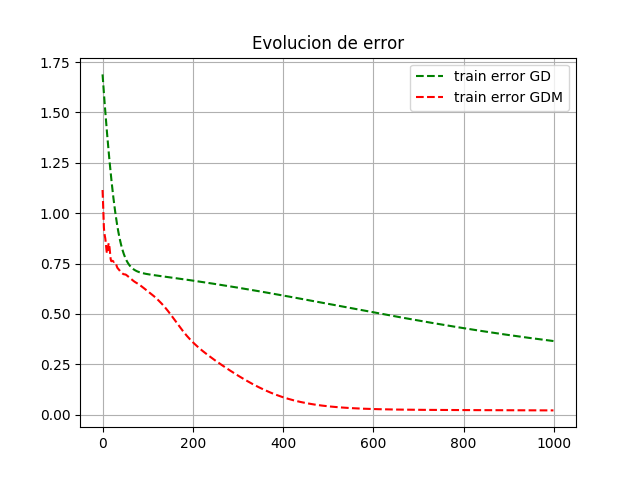

In [13]:
plt.figure()
plt.title('Evolucion de error')
x = range(len(err_gd))
line1, = plt.plot(x, err_gd,'g--',label='train error GD')
line2, = plt.plot(x, err_gdm, 'r--', label='train error GDM')
legend = plt.legend(handles=[line1, line2])
plt.grid(True)
plt.show()

# Prueba con dataset MACHINE: problema de regresión

1. Title: Relative CPU Performance Data 

2. Source Information
   -- Creators: Phillip Ein-Dor and Jacob Feldmesser
     -- Ein-Dor: Faculty of Management; Tel Aviv University; Ramat-Aviv; 
        Tel Aviv, 69978; Israel
   -- Donor: David W. Aha (aha@ics.uci.edu) (714) 856-8779   
   -- Date: October, 1987
 
3. Past Usage:
    1. Ein-Dor and Feldmesser (CACM 4/87, pp 308-317)
       -- Results: 
          -- linear regression prediction of relative cpu performance
          -- Recorded 34% average deviation from actual values 
    2. Kibler,D. & Aha,D. (1988).  Instance-Based Prediction of
       Real-Valued Attributes.  In Proceedings of the CSCSI (Canadian
       AI) Conference.
       -- Results:
          -- instance-based prediction of relative cpu performance
          -- similar results; no transformations required
    - Predicted attribute: cpu relative performance (numeric)

4. Relevant Information:
   -- The estimated relative performance values were estimated by the authors
      using a linear regression method.  See their article (pp 308-313) for
      more details on how the relative performance values were set.

5. Number of Instances: 209 

6. Number of Attributes: 10 (6 predictive attributes, 2 non-predictive, 
                             1 goal field, and the linear regression's guess)

7. Attribute Information:
   1. vendor name: 30 
      (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
       dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
       microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
       sratus, wang)
   2. Model Name: many unique symbols
   3. MYCT: machine cycle time in nanoseconds (integer)
   4. MMIN: minimum main memory in kilobytes (integer)
   5. MMAX: maximum main memory in kilobytes (integer)
   6. CACH: cache memory in kilobytes (integer)
   7. CHMIN: minimum channels in units (integer)
   8. CHMAX: maximum channels in units (integer)
   9. PRP: published relative performance (integer)
  10. ERP: estimated relative performance from the original article (integer)

8. Missing Attribute Values: None

9. Class Distribution: the class value (PRP) is continuously valued.
   PRP Value Range:   Number of Instances in Range:
   0-20               31
   21-100             121
   101-200            27
   201-300            13
   301-400            7
   401-500            4
   501-600            2
   above 600          4

Summary Statistics:
	   Min  Max   Mean    SD      PRP Correlation
   MCYT:   17   1500  203.8   260.3   -0.3071
   MMIN:   64   32000 2868.0  3878.7   0.7949
   MMAX:   64   64000 11796.1 11726.6  0.8630
   CACH:   0    256   25.2    40.6     0.6626
   CHMIN:  0    52    4.7     6.8      0.6089
   CHMAX:  0    176   18.2    26.0     0.6052
   PRP:    6    1150  105.6   160.8    1.0000
   ERP:   15    1238  99.3    154.8    0.9665



In [30]:
import pandas as pd
DATASET_PATH = "machine/machine.data.txt"
columns=["vendor","model","MYCT","MMIN","MMAX","CACH","CHMIN","CHMAX","PRP","ERP"]
df = pd.read_csv(DATASET_PATH, names=columns)

In [31]:
df.head()

,vendor,model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [12]:
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


## Partición de datos

In [17]:
inputs = df.loc[:,["MYCT","MMIN","MMAX","CACH","CHMIN","CHMAX","PRP"]]
targets = df.loc[:,["ERP"]]

def split_dataset(num_instances, train=.80):
    array = np.arange(num_instances)
    np.random.shuffle(array)
    train = int(num_instances*train)
    train_index = array[:train]
    test_index = array[train:]
    return (train_index, test_index)
    

In [18]:
train_index, test_index = split_dataset(len(df))
print(train_index)
print(test_index)

[ 34 201 191 180 105  18  96 171  85  51 121 108 154  28 138  14 166 192
  15  57  41 113 193  79  27 195 206   4  98  94  40 185  73  13 159 175
 165 162 139  80  19  16 104 149  68 147 200 194  21 125 197  12 186 208
 164  87 107  78  52   3  39 110  84 182  37 102 136  44  75  97  88   6
   0 153 144  70 116 152  24  82 112  67   2  65 133  64  69 177  46 205
   8  32  11 145 174  90 163 188  83 155  91  63 135  25 141 114 124  76
 202  66 103 183 130   9 158 170 167 169 189  71  59  23  10  53 157 128
 181  50 168 117 119 123  86 137  20 111  48   1 109  74  29  31  17 120
 148  22 173   7  77 127 143 161  56 198  89  81  26  62 118  35  36  49
  92  47 134 204 150]
[176 106 203 151  99 207  93  55 142 129  54 190 156 146 178 199  45   5
 184  60 101 126  61 100 172 122 179  95  43  38  33  42  30 187  58 115
 140 132 160 131  72 196]


In [19]:
train = df.iloc[train_index]
X_train = train.loc[:,["MYCT","MMIN","MMAX","CACH","CHMIN","CHMAX","PRP"]]
Y_train = train.loc[:,["ERP"]]
test = df.iloc[test_index]
X_test = test.loc[:,["MYCT","MMIN","MMAX","CACH","CHMIN","CHMAX","PRP"]]
Y_test = test.loc[:,["ERP"]]

## Entrenamiento de Red Neuronal Articifial


Gradiente descendente

Error: 1.15e+2, epoch 0
Error: 2.51e+0, epoch 100
Error: 1.35e+0, epoch 200
Error: 1.33e+0, epoch 300
Error: 1.31e+0, epoch 400

Gradiente descendente con momentum

Error: 1.49e+2, epoch 0
Error: 1.00e+0, epoch 100
Error: 8.84e-1, epoch 200
Error: 8.12e-1, epoch 300
Error: 7.44e-1, epoch 400


<IPython.core.display.Javascript object>


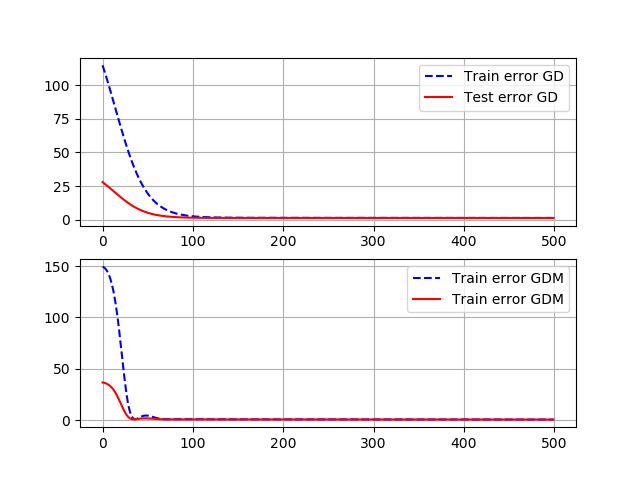

In [20]:
train_data = {'input':X_train, 'target':Y_train}
test_data = {'input':X_test, 'target':Y_test}
trainGD = GradientDescent2(eta=0.0001)
trainGDM = GradientDescentMomentum2(eta=0.0001, gamma=0.9)
print("\nGradiente descendente\n")
model_gd,errtrain_gd, errtest_gd = test_net(trainGD, train_data, test_data=test_data, max_epoch=500)
print("\nGradiente descendente con momentum\n")
model_gdm,errtrain_gdm, errtest_gdm = test_net(trainGDM, train_data, test_data=test_data, max_epoch=500)

plt.figure()
plt.title('Evolucion de error')
epochs = range(len(errtrain_gd))

plt.subplot(2,1,1)
line_gdtrain, = plt.plot(epochs, errtrain_gd,'b--', label='Train error GD') 
line_gdtest, = plt.plot(epochs, errtest_gd, 'r-', label='Test error GD')
legend = plt.legend(handles=[line_gdtrain, line_gdtest])
plt.grid(True)

plt.subplot(2,1,2)
line_gdmtrain, = plt.plot(epochs, errtrain_gdm,'b--', label='Train error GDM')
line_gdmtest, = plt.plot(epochs, errtest_gdm, 'r-', label='Train error GDM')
legend = plt.legend(handles=[line_gdmtrain, line_gdmtest])
plt.grid(True)

# Desarrollo de práctica 8

### Actividad 1
Desarrollar el algoritmo de aprendizaje "Gradiente descendente con momentum y tasa de aprendizaje adaptativa" (GDX). Modificar las clases correspondientes (por ej. net) para que se pueda implementar el algoritmo de forma eficiente.

Es importante señalar que este algoritmo es muy similar al GDM, por lo tanto, se debería basar el algoritmo GDX enteramente en el GDM.

### Actividad 2

Proponer un modelo RNA con los algoritmos de aprendizaje GD (o GDM) y GDX para los siguientes problemas:
1. Machine
3. Iris

# Regla de actualización para Gradiente Descendente con momentum y tasa de aprendizaje adaptativa

### Valores por defecto

$\Large \eta = 0.01,\\ \Large \eta_{dec} = 0.7,\\ \Large \eta_{inc} = 1.05,\\ \Large \gamma = 0.9 \\ $

$$\Large W_{k+1} = W_{k} + \Delta W_{k} \\ $$
### Donde
$$\Large \Delta W_{k} = \gamma \Delta W_{k-1} - \eta_{k+1} \delta^l a^{l-1} \\ $$
### Donde
$$\Large \eta_{k+1} = \beta\eta_{k} \\ $$


$$
\Large
\beta =
  \begin{cases}
    \eta_{dec}  & \quad \text{if } error^{new}> (1.04)error^{old}\\ \\
    \eta_{inc}  & \quad \text{if } error^{new}< (1.04)error^{old}\\
  \end{cases}
 $$





